# Assumptions in Regression
Regression is a parametric approach. ‘Parametric’ means it makes assumptions about data for the purpose of analysis. Due to its parametric side, regression is restrictive in nature. It fails to deliver good results with data sets which doesn’t fulfill its assumptions. Therefore, for a successful regression analysis, it’s essential to validate these assumptions.<br>

Let’s look at the important assumptions in regression analysis:
1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s).
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5.  The error terms must be normally distributed.

## 1. Linear and Additive:  

If you fit a linear model to a non-linear, non-additive data set, the regression algorithm would fail to capture the trend mathematically, thus resulting in an inefficient model. Also, this will result in erroneous predictions on an unseen data set.

**How to check:** Look for residual vs fitted value plots (explained below). Also, you can include polynomial terms (X, X², X³) in your model to capture the non-linear effect.

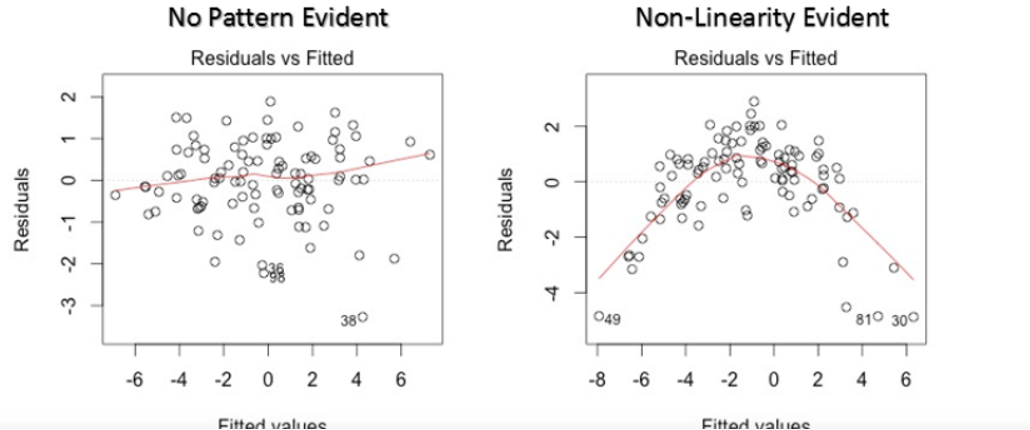

This scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values). It is one of the most important plot which everyone must learn. It reveals various useful insights including outliers. The outliers in this plot are labelled by their observation number which make them easy to detect.<br>
If there exist any pattern (may be, a parabolic shape) in this plot, consider it as signs of non-linearity in the data. It means that the model doesn’t capture non-linear effects.<br>

**Solution:** To overcome the issue of non-linearity, you can do a non linear transformation of predictors such as log (X), √X or X² transform the dependent variable.

<mark>Converting non-linear data to linear data:</mark>

There are many cases where variables we would like to build a model for are not linearly correlated. This leads to failures for the above assumptions when fitting linear regression models to them. We may apply transformation functions to these variables in order to make the relationship linear. The following figure is useful in helping us decide what transformation to apply to non-linear data that we are working with.

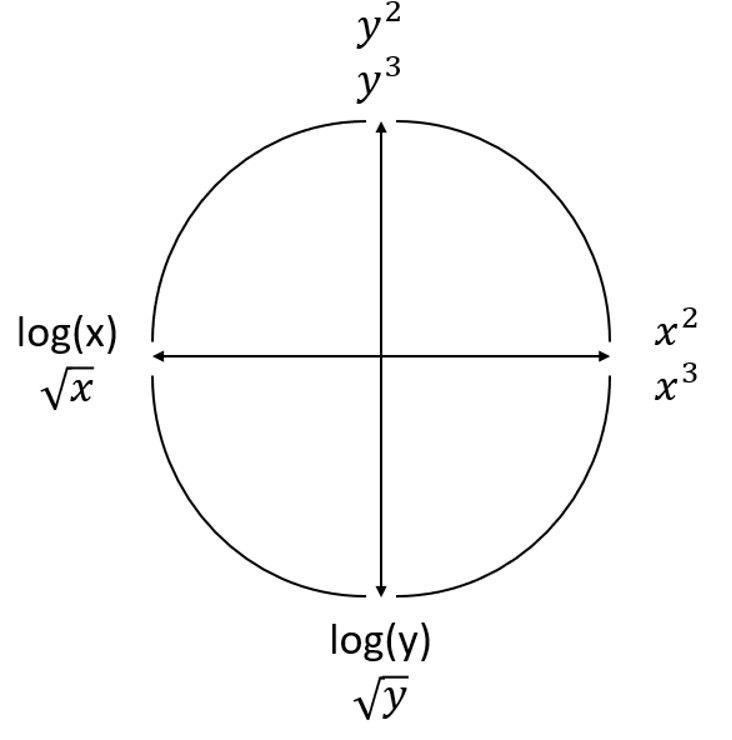<br>
Tukey and Mosteller’s Bulging Rule Diagram (also known as the Ladder of Powers Rule)
                            
The goal of this article is to demonstrate how to use this diagram to make transformations to your data. Before we get into examples, the way you can read this diagram is:
1. If you see data that looks like the curve in the top left, you can try to decrease the power of x and/or increase the power of y.
2. If you see data that looks like the curve in the top right, you can try to increase the power of x and/or increase the power of y.
3. If you see data that looks like the curve in the bottom right, you can try to increase the power of x and/or decrease the power of y.
4. If you see data that looks like the curve in the bottom left, you can try to decrease the power of x and/or decrease the power of y.


In [ ]:
# Python code:
import matplotlib.pyplot as plt
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)
plt.show()

# You can also use sns.residplot or sns.regplot

## 2. Autocorrelation: 

The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.<br>

If this happens, it causes confidence intervals and prediction intervals to be narrower. Narrower confidence interval means that a 95% confidence interval would have lesser probability than 0.95 that it would contain the actual value of coefficients. Let’s understand narrow prediction intervals with an example:<br>
For example, the least square coefficient of X¹ is 15.02 and its standard error is 2.08 (without autocorrelation). But in presence of autocorrelation, the standard error reduces to 1.20. As a result, the prediction interval narrows down to (13.82, 16.22) from (12.94, 17.10).<br>
Also, lower standard errors would cause the associated p-values to be lower than actual. This will make us incorrectly conclude a parameter to be statistically significant.

**How to check:** Look for <mark>Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation.</mark> Also, you can see residual vs time plot and look for the seasonal or correlated pattern in residual values.

## 3. Multicollinearity: 
This phenomenon exists when the independent variables are found to be moderately or highly correlated. In a model with correlated variables, it becomes a tough task to figure out the true relationship of a predictors with response variable. In other words, it becomes difficult to find out which variable is actually contributing to predict the response variable.<br>

Another point, with presence of correlated predictors, the standard errors tend to increase. And, with large standard errors, the confidence interval becomes wider leading to less precise estimates of slope parameters.<br>

Also, when predictors are correlated, the estimated regression coefficient of a correlated variable depends on which other predictors are available in the model. If this happens, you’ll end up with an incorrect conclusion that a variable strongly / weakly affects target variable. Since, even if you drop one correlated variable from the model, its estimated regression coefficients would change. That’s not good!<br>

**How to check:** You can use scatter plot to visualize correlation effect among variables. Also, you can also use VIF(Variable Inflation Factors) factor.Above all, a correlation table should also solve the purpose.

VIF: VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.
- VIF equal to 1 = variables are not correlated
- VIF between 1 and 5 = variables are moderately correlated 
- VIF greater than 5 = variables are highly correlated

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

   # Calculating VIF

   vif = pd.DataFrame()

   vif["variables"] = X.columns

   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

## 4. Heteroskedasticity: 
The presence of non-constant variance in the error terms results in heteroskedasticity. Generally, non-constant variance arises in presence of outliers or extreme leverage values. Look like, these values get too much weight, thereby disproportionately influences the model’s performance.When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.

**How to check:** You can look at residual vs fitted values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern (shown in next section). Also, you can use Breusch-Pagan / Cook – Weisberg test or White general test to detect this phenomenon.

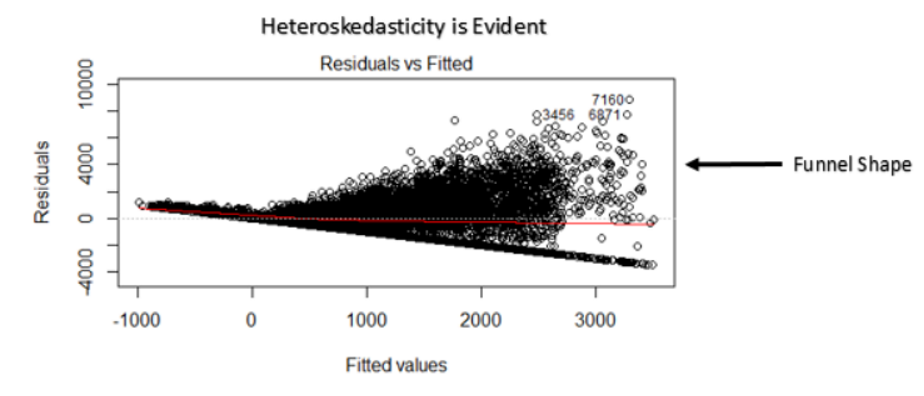

## 5. Normal Distribution of error terms: 
If the error terms are non-normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Presence of non – normal distribution suggests that there are a few unusual data points which must be studied closely to make a better model.
How to check: You can look at QQ (quantile-quantile)plot (shown below). You can also perform statistical tests of normality such as Kolmogorov-Smirnov test, Shapiro-Wilk test.

QQ plot

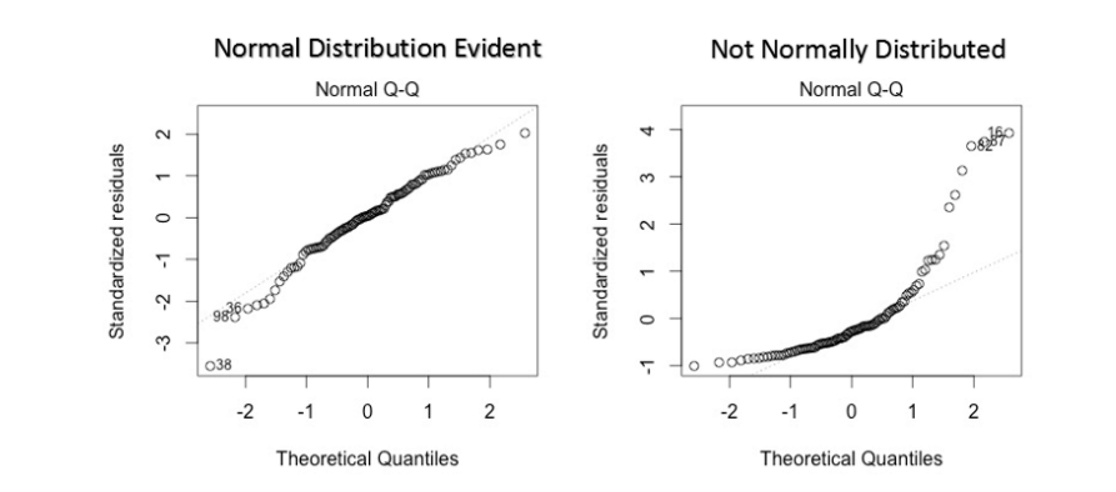

This q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.<br>
If data comes from normal distribution then plot would show fairly straight line. Absence of normality in the errors can be seen with deviation in the straight line.<br>

**Solution:** If the errors are not normally distributed, non – linear transformation of the variables (response or predictors) can bring improvement in the model.
A nonlinear transformation changes (increases or decreases) linear relationships between variables and, thus, changes the correlation between variables. ... Examples of nonlinear transformation of variable x would be taking the square root x or the reciprocal of x.

In [ ]:
# Python code:
import numpy as np
import statsmodels.api as sm
import pylab as py

# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code 
# the graph look different than shown below.

# Random data points generated
data_points = np.random.normal(0, 1, 100)

sm.qqplot(data_points, line ='45')
py.show()

### Kolmogorov-Smirnov test (KS test):
In statistics, the Kolmogorov–Smirnov test is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution, or to compare two samples.
The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples.

kstest function in scipy Python –<br>
**Parameters:**<br>
**Statistics:** This is the calculated value of D, where D=|F(x)-Sn(x)|.<br>
- This D is compared with Dalpha where alpha is the level of significance. Alpha is defined as the probability of rejecting the null hypothesis given the null hypothesis(H0) is true. For most of the practical applications, alpha is chosen as 0.05.<br>

**p-value:** This is calculated with the help of D.<br>
- If pvalue > alpha, we fail to reject the null hypothesis. Otherwise, we conclude that the numbers are not uniform. Ideally, the p-value should be as large as possible. For perfect uniform distribution pvalue=1 and Statisitics=0.


In [ ]:
from scipy.stats import kstest
import random

# N = int(input("Enter number of random numbers: "))
N = 5

actual =[]
print("Enter outcomes: ")
for i in range(N):
	# x = float(input("Outcomes of class "+str(i + 1)+": "))
	actual.append(random.random())

print(actual)
x = kstest(actual, "uniform")
print(x)